In [1]:
from google.colab import drive
# mount your Google Drive
drive.mount('/content/drive', force_remount=True)
root_path = '/content/drive/My Drive/Colab Notebooks/SAR_codes/OPTICAL_SAR/new_images/' 

Mounted at /content/drive


In [13]:
import numpy as np
from osgeo import ogr, gdal
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def load_tif_image(patch):
    # Read tiff Image
    print (patch)
    gdal_header = gdal.Open(patch)
    img = gdal_header.ReadAsArray()
    print('Image shape :', img.shape)
    return img

def normalization(image, norm_type = 1):
    image_reshaped = image.reshape((image.shape[0]*image.shape[1]),image.shape[2])
    if (norm_type == 1):
        scaler = StandardScaler()
    if (norm_type == 2):
        scaler = MinMaxScaler(feature_range=(0,1))
    if (norm_type == 3):
        scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(image_reshaped)
    image_normalized = scaler.transform(image_reshaped)
    image_normalized1 = image_normalized.reshape(image.shape[0],image.shape[1],image.shape[2])
    return image_normalized1

In [3]:
# Loading t2 image
s2_t2 = load_tif_image(root_path + 'Sentinel2/2019_10m_b2348.tif')
s2_t2 = np.transpose(s2_t2.copy(), (1, 2, 0))
print(s2_t2.shape)

/content/drive/My Drive/Colab Notebooks/SAR_codes/OPTICAL_SAR/new_images/Sentinel2/2019_10m_b2348.tif
Image shape : (4, 17729, 9202)
(17729, 9202, 4)


In [4]:
# loading reference 2019 (t2)
current_def = load_tif_image(root_path + 'references/reference_10m/r10m_def_2019.tif').astype('int')

# inverting reference
current_def = (np.logical_not(current_def.copy()))*1
print(current_def.shape, np.unique(current_def))

/content/drive/My Drive/Colab Notebooks/SAR_codes/OPTICAL_SAR/new_images/references/reference_10m/r10m_def_2019.tif
Image shape : (17729, 9202)
(17729, 9202) [0 1]


In [5]:
# number of channels
channels = s2_t2.shape[-1]
print(channels)
current_def_matrix = np.repeat(np.expand_dims(current_def, axis = -1), channels, axis=-1)
print(current_def_matrix.shape)

4
(17729, 9202, 4)


In [6]:
#s2_t2 = s2_t2[:4000, :4000, :]
#current_def_matrix = current_def_matrix[:4000, :4000, :]

In [7]:
# multiplying the s2 image with the current deforestation mask
s2_t2_with_mask = s2_t2 * current_def_matrix

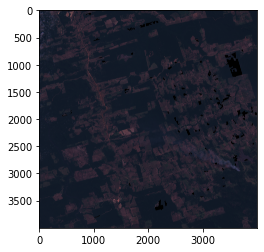

In [15]:
# normalizing image
s2_t2_with_mask = normalization(s2_t2_with_mask.copy(), norm_type = 2)
plt.imshow(s2_t2_with_mask[:,:,[2,1,0]])